In [21]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

import xarray as xr
import cartopy.crs as ccrs

import matplotlib.pyplot as plt

from pathlib import Path

import sys
sys.path.append("..")

import flutter


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
var = "tp"
var_map = {
    "2t":"t2m",
    "msl":"msl",
    "10fg":"fg10",
    "tp":"tp"
}
var2 = var_map[var]
# 

In [10]:
## Directories
dir_data = Path("../data/reduced")
# dir_fig = Path("../fig")
dir_fig = Path("../data/fig")
dir_vid = dir_fig/ "vid"

f_var_fun = lambda var : f"hundred_members_{var}_pf.nc"
f_var = {var:f_var_fun(var) for var in
    ["2t",
    "msl",
    "10fg",
    "tp"]}

In [11]:
figsize = (6,5)
# matplotlib.rcParams['figure.figsize'] = figsize


In [12]:
## Load rain data

filename = dir_data/f_var[var]
da = xr.load_dataset(filename)
da = da.assign_coords({"longitude": [ i if i <= 180 else i-360 for i in da.longitude.values]})
# reduce spatial range
da = da.sel(longitude=slice(-20,20),latitude=slice(65,35))


In [20]:
da.sel(number=1).sum(["latitude","longitude"])[var2].plot()

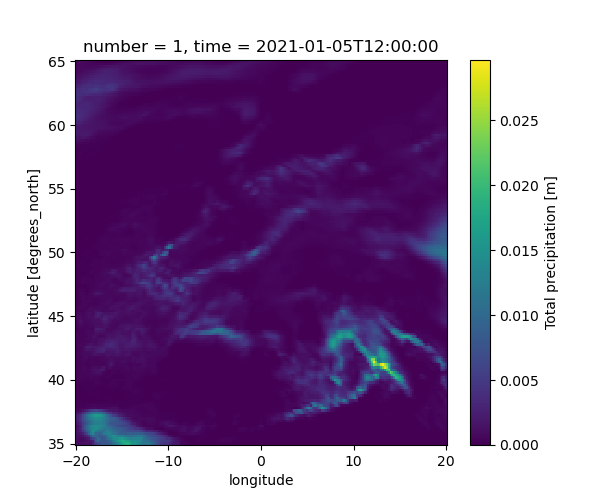

In [14]:
da.sel(number=1).isel(time=1)[var2].plot(figsize=figsize)

In [ ]:
# da_mean = da.mean(dim="number")

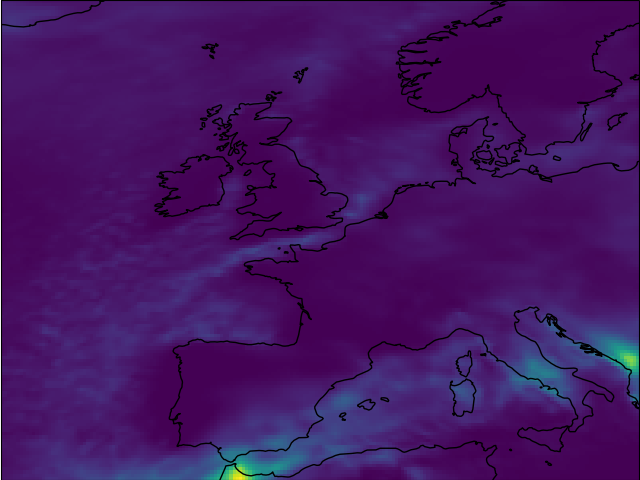

In [22]:
## Animation
# evolving timesteps 
# precipitation

# Es=[50]
Es=[50,100] 
# Es=[10,20,50,100]

timesteps = 5
Ts = range(0,11,11//timesteps)

n_repetitions = 2
shuffle = True

prec_threshold = None
# temp_threshold = 273.15 
# params_temp = dict(vmin=250, vmax=290)


for E in Es:
    flutter.export_flutter(da,var2,Ts,E,
            filename=dir_vid/f"ensembles_time_tp_full_T{timesteps}_{E}.mp4",
            projection= ccrs.PlateCarree(),
            transform = ccrs.PlateCarree(),
            # plot_params=params_temp,
            threshold=prec_threshold,
            n_repetitions=n_repetitions, shuffle=shuffle,
            title=f"Total Precipitation N_ens:{E:3}"
            )

In [ ]:
# ## Animation
# # evolving timesteps 
# # threshold temperature - freezing

# # Es=[50]
# Es=[50,100] 
# # Es=[10,20,50,100]

# timesteps = 5
# Ts = range(0,11,11//timesteps)

# n_repetitions = 2
# shuffle = True

# # temp_threshold = 268
# temp_threshold = 273.15 
# params_temp = dict(vmin=250, vmax=290)


# for E in Es:
#     flutter.export_flutter(da,var2,Ts,E,
#             filename=dir_vid/f"ensembles_time_freezing_T{timesteps}_{E}.mp4",
#             projection= ccrs.PlateCarree(),
#             transform = ccrs.PlateCarree(),
#             plot_params=params_temp,
#             threshold=temp_threshold,
#             n_repetitions=n_repetitions, shuffle=shuffle,
#             title=f"Temperatures <0⁰C N_ens:{E:3}"
#             )

In [ ]:
# ## Animation
# # evolving timesteps 
# # threshold temperature - subfreezing

# # Es=[50]
# Es=[50,100] 
# # Es=[10,20,50,100]

# timesteps = 5
# Ts = range(0,11,11//timesteps)

# n_repetitions = 2
# shuffle = True

# temp_threshold = 268
# # temp_threshold = 273.15 
# params_temp = dict(vmin=250, vmax=290)


# for E in Es:
#     flutter.export_flutter(da,var2,Ts,E,
#             filename=dir_vid/f"ensembles_time_subfreezing_T{timesteps}_{E}.mp4",
#             projection= ccrs.PlateCarree(),
#             transform = ccrs.PlateCarree(),
#             plot_params=params_temp,
#             threshold=temp_threshold,
#             n_repetitions=n_repetitions, shuffle=shuffle,
#             title=f"Temperatures <-5⁰C N_ens:{E:3}"
#             )

In [ ]:
# f"N_ens:{E:3}  time: {datef(dt)}"